# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import stats
from lib.plots.data import (DataPlotType, stack)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations

In [2]:
nsample = 10000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

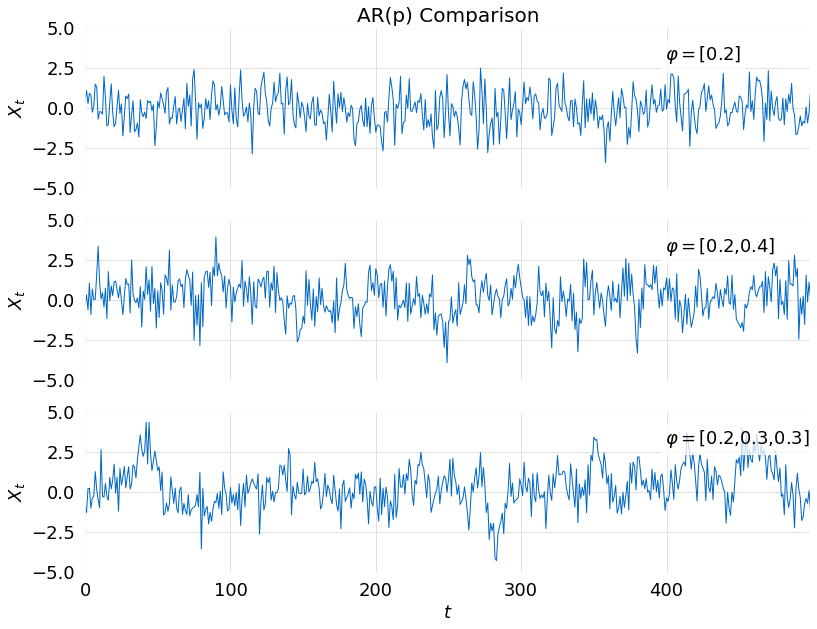

In [3]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
stack(samples, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example ($\varphi = 0.2$)

In [4]:
arima.yw(ar1, 1)

array([0.20123933])

In [5]:
result = arima.ar_fit(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20130309]),
 array([0.01256436, 0.00986444, 0.01413487]))

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14222.997
Date:                Sat, 16 Apr 2022   AIC                          28451.993
Time:                        11:41:33   BIC                          28473.625
Sample:                             0   HQIC                         28459.315
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0107      0.013     -0.853      0.394      -0.035       0.014
ar.L1          0.2013      0.010     20.407      0.000       0.182       0.221
sigma2         1.0067      0.014     71.220      0.000       0.979       1.034
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.99   Prob(JB):                         0.53
Heteroskedasticity (H):               0.98   Skew:                             0.02
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [7]:
arima.yw(ar2, 2)

array([0.2008221 , 0.40558658])

In [8]:
result = arima.ar_fit(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20082471, -0.4055457 ]),
 array([0.02550731, 0.00919122, 0.00919002, 0.01398856]))

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -14220.148
Date:                Sat, 16 Apr 2022   AIC                          28448.296
Time:                        11:41:34   BIC                          28477.137
Sample:                             0   HQIC                         28458.058
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0488      0.026     -1.913      0.056      -0.099       0.001
ar.L1          0.2008      0.009     21.850      0.000       0.183       0.219
ar.L2          0.4055      0.009     44.129      0.000       0.388       0.424
sigma2         1.0061      0.014     71.923      0.000       0.979       1.034
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 3.21
Prob(Q):                              0.63   Prob(JB):                         0.20
Heteroskedasticity (H):               0.96   Skew:                            -0.03
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [10]:
arima.yw(ar3, 3)

array([0.20481737, 0.29721603, 0.29771569])

In [11]:
result = arima.ar_fit(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20447676, -0.29766232, -0.29814006]),
 array([0.05028178, 0.00972949, 0.00925283, 0.00962296, 0.01410736]))

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14231.684
Date:                Sat, 16 Apr 2022   AIC                          28473.368
Time:                        11:41:34   BIC                          28509.420
Sample:                             0   HQIC                         28485.571
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0217      0.050     -0.432      0.666      -0.120       0.077
ar.L1          0.2045      0.010     21.016      0.000       0.185       0.224
ar.L2          0.2977      0.009     32.170      0.000       0.280       0.316
ar.L3          0.2981      0.010     30.982      0.000       0.279       0.317
sigma2         1.0084      0.014     71.483      0.000       0.981       1.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.32
Prob(Q):                              0.99   Prob(JB):                         0.19
Heteroskedasticity (H):               1.08   Skew:                            -0.04
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Simulations $\sigma = 5.0$

In [13]:
nsample = 10000
σ = 5.0

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample, σ)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample, σ)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample, σ)

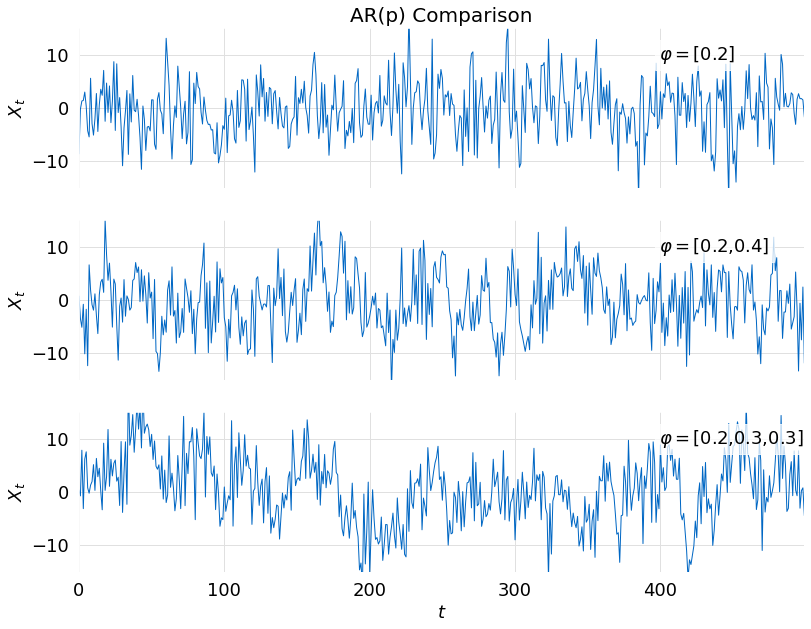

In [14]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
stack(samples, ylim=[-15.0, 15.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

### AR(1) Example ($\varphi = 0.2$)

In [15]:
arima.yw(ar1, 1)

array([0.19809427])

In [16]:
result = arima.ar_fit(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19820459]),
 array([0.06221671, 0.00977009, 0.34876001]))

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -30259.305
Date:                Sat, 16 Apr 2022   AIC                          60524.611
Time:                        11:41:35   BIC                          60546.242
Sample:                             0   HQIC                         60531.933
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1150      0.062     -1.848      0.065      -0.237       0.007
ar.L1          0.1982      0.010     20.287      0.000       0.179       0.217
sigma2        24.8744      0.349     71.322      0.000      24.191      25.558
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 2.74
Prob(Q):                              0.62   Prob(JB):                         0.25
Heteroskedasticity (H):               0.97   Skew:                            -0.04
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [18]:
arima.yw(ar2, 2)

array([0.19960657, 0.39886661])

In [19]:
result = arima.ar_fit(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19958645, -0.39884646]),
 array([0.12336763, 0.00915576, 0.00914201, 0.34356552]))

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -30186.657
Date:                Sat, 16 Apr 2022   AIC                          60381.314
Time:                        11:41:35   BIC                          60410.155
Sample:                             0   HQIC                         60391.076
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1316      0.123     -1.066      0.286      -0.373       0.110
ar.L1          0.1996      0.009     21.799      0.000       0.182       0.218
ar.L2          0.3988      0.009     43.628      0.000       0.381       0.417
sigma2        24.5213      0.344     71.373      0.000      23.848      25.195
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.89   Prob(JB):                         0.68
Heteroskedasticity (H):               1.03   Skew:                             0.01
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [21]:
arima.yw(ar3, 3)

array([0.18949203, 0.2978233 , 0.30540842])

In [22]:
result = arima.ar_fit(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.18949046, -0.29776307, -0.30539307]),
 array([0.24154283, 0.00961092, 0.00934409, 0.00940463, 0.35965383]))

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -30289.103
Date:                Sat, 16 Apr 2022   AIC                          60588.206
Time:                        11:41:36   BIC                          60624.257
Sample:                             0   HQIC                         60600.409
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1360      0.242     -0.563      0.573      -0.609       0.337
ar.L1          0.1895      0.010     19.716      0.000       0.171       0.208
ar.L2          0.2978      0.009     31.866      0.000       0.279       0.316
ar.L3          0.3054      0.009     32.473      0.000       0.287       0.324
sigma2        25.0254      0.360     69.582      0.000      24.321      25.730
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.98   Prob(JB):                         0.43
Heteroskedasticity (H):               1.00   Skew:                            -0.00
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""